In [2]:
# importing libraries
import pandas as pd
from sklearn import linear_model
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
# Loading the train and test data
train_df = pd.read_csv('../data/BikeRentalDaily_train.csv', delimiter=';')
test_df = pd.read_csv('../data/BikeRentalDaily_test.csv', delimiter=';')

In [4]:
# Minimal Preprocessing steps
# removing the 'dteday'  and 'instant' feature
train_df = train_df.drop('dteday', axis=1) #.drop('instant', axis=1)
test_df = test_df.drop('dteday', axis=1) #.drop('instant', axis=1)

In [5]:
# Replacing all MissingValues with the most frequent values
imp_most_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

train_df[:] = imp_most_freq.fit_transform(train_df)
test_df[:] = imp_most_freq.fit_transform(test_df)

In [6]:
# Splitting the train data into features and labels
train_features = train_df.iloc[:, :13]
train_labels = train_df.iloc[:, -1:]

# Splitting the test data into features and labels
test_features = test_df.iloc[:, :13]
test_labels = test_df.iloc[:, -1:]

In [7]:
#train_features
train_labels

#test_features
#test_labels

,cnt
0,5312
1,5445
2,2236
3,6370
4,7836
...,...
595,3117
596,2703
597,4097
598,3894


In [8]:
test_labels.to_numpy()

array([[ 3894],
       [ 5936],
       [ 5629],
       [ 3310],
       [ 4748],
       [ 1450],
       [ 7040],
       [ 6778],
       [ 5119],
       [ 4332],
       [ 5115],
       [ 6598],
       [ 2496],
       [ 5464],
       [ 6118],
       [ 7580],
       [ 6883],
       [ 2432],
       [ 5375],
       [ 6227],
       [ 7852],
       [ 1115],
       [ 4687],
       [ 2056],
       [ 4484],
       [ 5302],
       [ 4220],
       [ 4911],
       [ 6734],
       [ 3873],
       [ 6234],
       [ 7105],
       [ 7538],
       [ 4507],
       [ 1421],
       [ 4367],
       [ 1817],
       [ 2134],
       [ 2431],
       [ 5202],
       [ 5538],
       [ 1550],
       [ 2485],
       [ 4342],
       [ 4036],
       [  683],
       [ 3644],
       [ 7534],
       [ 4541],
       [ 5499],
       [ 7363],
       [ 4401],
       [ 7592],
       [ 3387],
       [ 3523],
       [ 5102],
       [ 5698],
       [ 3577],
       [ 5668],
       [ 3846],
       [ 6772],
       [ 2294],
       [

In [9]:
# Model building
# We use linear regression, which is a supervised learning technique 
# with usage of labeled training data.
reg_model_before_pp = linear_model.LinearRegression()

reg_model_before_pp.fit(train_features, train_labels)

print(reg_model_before_pp.coef_)

[[ 1.24294882e+00  3.15719720e+02  1.99436579e+03 -3.54038301e+00
  -1.04678985e+03  1.82091578e+02 -4.71749309e+02 -7.48293456e+02
  -1.55008874e+01  7.94676335e+03 -7.04580755e+00 -6.30206852e+02
   9.13325512e-01]]


In [10]:
# Predict all test examples
ypred = reg_model_before_pp.predict(test_features)
ypred

array([[3406.9932736 ],
       [5089.67118593],
       [6893.58964078],
       [2381.29972783],
       [3495.756797  ],
       [ 696.39473747],
       [7629.06916376],
       [5843.83408871],
       [6781.57592485],
       [5900.84318077],
       [5367.8802674 ],
       [7521.66103429],
       [3392.46884844],
       [8149.93997078],
       [6684.35830847],
       [7905.54699563],
       [7412.91704975],
       [2419.05241288],
       [5465.43898259],
       [7696.61069886],
       [7510.5236049 ],
       [4989.11532123],
       [4176.96843099],
       [1240.87449579],
       [6273.7230086 ],
       [5420.55149342],
       [5942.6946315 ],
       [4730.3594732 ],
       [7547.89727355],
       [5307.62372381],
       [6138.19940021],
       [7362.78098889],
       [7256.54392756],
       [5573.02496653],
       [1283.71452962],
       [5776.50021622],
       [2670.1314791 ],
       [1354.34383982],
       [2787.95457997],
       [5331.39070204],
       [5319.01750342],
       [1312.922

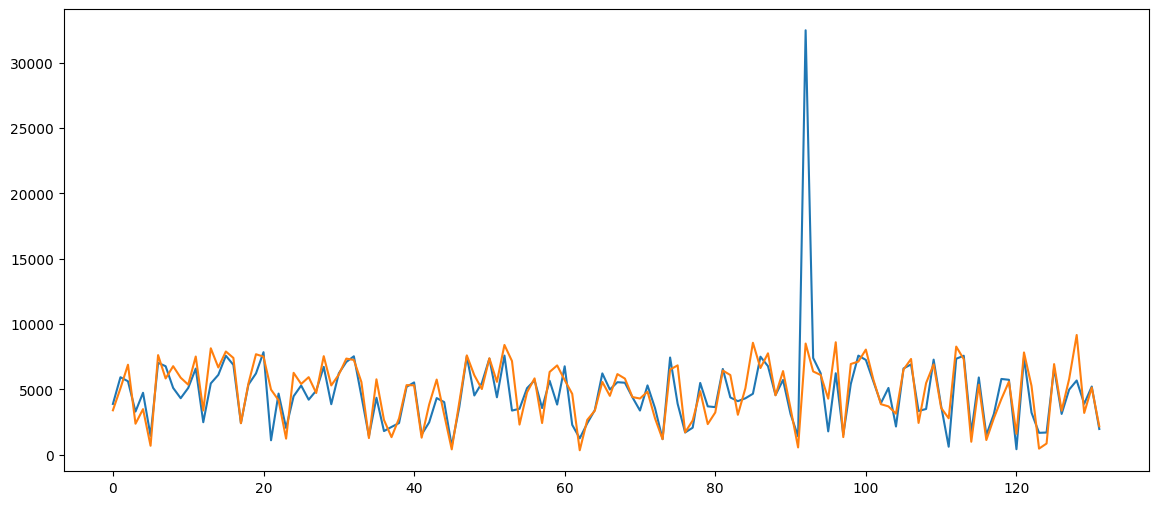

In [11]:
plt.figure(figsize=(14,6))
plt.plot(test_labels)
plt.plot(ypred)

In [12]:
print(f"Predict label for following example:\n{test_features.iloc[0,:]}")

#Predict a single value
predicted_value = reg_model_before_pp.predict([test_features.iloc[0,:]])[0]

print("\nPredicted label: ",predicted_value)
print("Actual label:", test_labels.iloc[0])
print("Deviation predicted from actual value: ",predicted_value - test_labels.iloc[0])

Predict label for following example:
instant       299.000000
season          4.000000
yr              0.000000
mnth           10.000000
holiday         0.000000
weekday         3.000000
workingday      1.000000
weathersit      2.000000
temp           19.366700
atemp           0.472846
hum           108.062550
windspeed       0.148642
leaflets      605.000000
Name: 0, dtype: float64

Predicted label:  [3406.9932736]
Actual label: cnt    3894
Name: 0, dtype: int64
Deviation predicted from actual value:  cnt   -487.006726
Name: 0, dtype: float64


c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:
print(round(ypred[:10] - test_labels.iloc[0:10])*100000, 2)

           cnt
0  -48700000.0
1  -84600000.0
2  126500000.0
3  -92900000.0
4 -125200000.0
5  -75400000.0
6   58900000.0
7  -93400000.0
8  166300000.0
9  156900000.0 2


In [14]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",reg_model_before_pp.score(test_features, test_labels))

MAE: 1054.862
R^2 value of the model:  0.4001965370904248
